In [1]:
%matplotlib notebook
%matplotlib notebook
import ipykernel
import matplotlib
import numpy as np
import scipy.interpolate as sp
import pylab
import matplotlib.pyplot as plt
import math
import csv

[ 0.          0.02110049  0.08440197  0.18990442  0.33760786  0.52751228
  0.75961769  1.03392407  1.35043144  1.70913979 -0.         -0.02110049
 -0.08440197 -0.18990442 -0.33760786 -0.52751228 -0.75961769 -1.03392407
 -1.35043144 -1.70913979]
original ang 0.000 rad 4.000 arc 8.000
modified ang 0.000 rad 4.000 arc 0.000
original ang 0.021 rad 379.138 arc 8.000
modified ang 0.021 rad 379.138 arc 8.000
original ang 0.084 rad 94.785 arc 8.000
modified ang 0.084 rad 94.785 arc 8.000
original ang 0.190 rad 42.126 arc 8.000
modified ang 0.190 rad 42.126 arc 8.000
original ang 0.338 rad 23.696 arc 8.000
modified ang 0.338 rad 23.696 arc 8.000
original ang 0.528 rad 15.166 arc 8.000
modified ang 0.528 rad 15.166 arc 8.000
original ang 0.760 rad 10.532 arc 8.000
modified ang 0.760 rad 10.532 arc 8.000
original ang 1.034 rad 7.738 arc 8.000
modified ang 1.034 rad 7.738 arc 8.000
original ang 1.350 rad 5.924 arc 8.000
modified ang 1.350 rad 5.924 arc 8.000
original ang 1.709 rad 4.681 arc 8.000


<IPython.core.display.Javascript object>


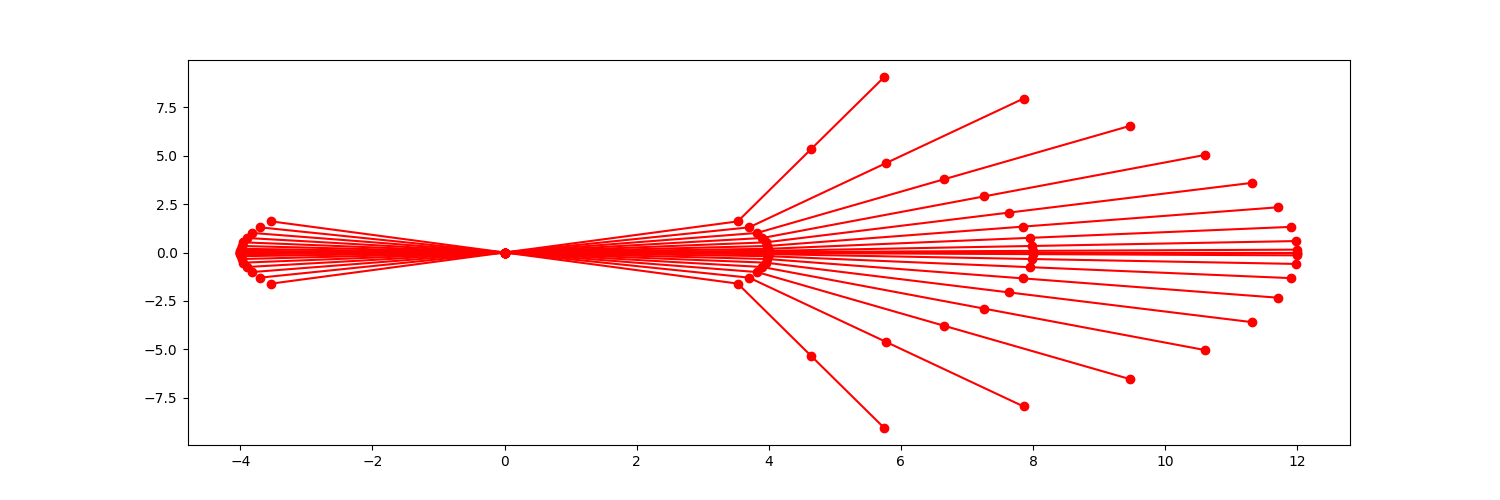

In [2]:
vlength = 2.68
steerRad = 0.52
arcLength = 8
count = 10

minTurnRad = vlength / math.tan(steerRad);
angularMax = arcLength / minTurnRad;



#radiusMax = 20.0
#radiusGranularity = 1.0
#angularMax = 1.28#np.pi


#Calculate the radius for a given angle
#angs = np.arange(0.01, angularMax + 0.01, 0.2)
#angs =  np.linspace(0.01, angularMax, 15, endpoint=True) ** 1.3
angs = np.linspace(0, angularMax, count, endpoint=True) ** 2 * angularMax/ (angularMax**2)
angs = np.append(angs,-angs)
print(angs)
#print( np.gradient(angs,0.01, axis=0))
#angs = np.logspace(1, 0.4, 10, base=10)
#angs = np.geomspace(0.01, angularMax, 10)



rads = []
#rads = np.linspace(radiusMax, 0, 10, endpoint=True)
for i in range(len(angs)):
    if angs[i] != 0:
        rads.append(arcLength/angs[i])
    else:
        rads.append(arcLength/2)

#The origin + the initial icc direction
deg = 0
origin = [0,0]#[arcLength/2,0]

#Create our spline points
spline = []
for i in range(len(angs)):
    rad = rads[i]
    ang = angs[i]
    
    print("original ang %.3f rad %.3f arc %.3f" % (ang, rad, arcLength))
    
    ratio = abs(ang / angularMax)
    percent = ratio * 0
   
    ang = ang - (ang * percent)
    
    print("modified ang %.3f rad %.3f arc %.3f" % (ang, rad, ang * rad))
    
    
    #print("radius %0.3f angle %0.3f" % (rads[i], angs[i]))
    #if rad >= (arcLength/angularMax):
       
    if ang != 0.0:
        spline.append( [ origin[0] + (rad * np.sin(deg + (-ang/2))) - (rad * math.sin(deg)),  origin[1] - (rad * np.cos(deg + (-ang/2))) + (rad * math.cos(deg)) ] )
        #spline.append( [ origin[0] - arcLength/2, origin[1]] )
        spline.append( [origin[0], origin[1]] )                   # Second point, the origin of the spline
    else:
        #spline.append( [ origin[0] - arcLength, origin[1]] )      # First control point
        spline.append( [ origin[0] - (arcLength/2), origin[1]] )  # First point of spline leading straight edge
        spline.append( [origin[0], origin[1]] )                   # Second point, the origin of the spline
        
    # Third and fourth are the constant radius points
    if ang != 0.0:
        spline.append( [ origin[0] + (rad * np.sin(deg + (ang/2.0))) - (rad * math.sin(deg)),  origin[1] - (rad * np.cos(deg + (ang/2.0))) + (rad * math.cos(deg)) ] )
        spline.append( [ origin[0] + (rad * np.sin(deg + ang)) - (rad * math.sin(deg)),        origin[1] - (rad * np.cos(deg + ang )) + (rad * math.cos(deg)) ] )
    else:
        spline.append( [origin[0] + rad * np.cos(ang), origin[1] + rad * np.sin(ang)] )
        spline.append( [origin[0] + 2*rad * np.cos(ang), origin[1] + 2*rad * np.sin(ang)] ) 

    #end control point [punault],[last] 
    xp = [spline[-2][0], spline[-1][0]]
    yp = [spline[-2][1], spline[-1][1]]

    # Final spline point, trailing straight edge
    spline.append( [(xp[1] - xp[0]) + xp[1] , (yp[1] - yp[0]) + yp[1]] ) 

    #Last control point
    #spline.append( [(xp[1] - xp[0]) * 2 + xp[1] , (yp[1] - yp[0]) * 2 + yp[1]] ) 
   
        
plt.figure(figsize=(15, 5))
for i in range(0, len(spline), 5):
    x = [spline[i][0],spline[i+1][0],spline[i+2][0],spline[i+3][0], spline[i+4][0]]#,spline[i+5][0], spline[i+6][0]] 
    y = [spline[i][1],spline[i+1][1],spline[i+2][1],spline[i+3][1], spline[i+4][1]]#,spline[i+5][1], spline[i+6][1]]
    plt.plot(x,y, '-ro')



# start = 6;
# length = len(spline);
# for i in range(start, length, 3):
#     x = np.array([priorPoint[0],origin[0],spline[i][0],spline[i+1][0], spline[i+2][0]]) 
#     y = np.array([priorPoint[1], origin[1],spline[i][1],spline[i+1][1], spline[i+2][1]])
#     xnew = np.linspace(x.min(),x.max(),300)
    
#     fc = sp.interp1d(x, y,kind='cubic')
#     pylab.plot(x, y, 'o', xnew, fc(xnew))
        
#     smooth = sp.spline(x,y,xnew)
#     plt.plot(xnew,smooth)
#     plt.plot(x,y, 'ro')
   
    

# t = np.arange(0.0, 1.0, 0.01)
# rad = 2.0
# # xcord =  (rad * np.cos( (np.pi/2.0) *t)) - rad
# # ycord =  (rad * np.sin( (np.pi/2.0) *t))
# deg = 0.0
# xcord = 0 + (rad * np.sin(deg + (np.pi/2.0) *t)) - (rad * math.sin(deg))
# ycord = 0 - (rad * np.cos(deg + (np.pi/2.0) *t)) + (rad * math.cos(deg))

# plt.plot(xcord, ycord, 'gx')
            

In [3]:
def CatmullRomSpline(P0, P1, P2, P3, a, nPoints=100):
    """
    P0, P1, P2, and P3 should be (x,y) point pairs that define the Catmull-Rom spline.
    nPoints is the number of points to include in this curve segment.
    """
    # Convert the points to numpy so that we can do array multiplication
    P0, P1, P2, P3 = map(np.array, [P0, P1, P2, P3])

    # Calculate t0 to t4
    alpha = a
    
    def tj(ti, Pi, Pj):
        xi, yi = Pi
        xj, yj = Pj
        return ( ( (xj-xi)**2 + (yj-yi)**2 )**0.5 )**alpha + ti

    t0 = 0
    t1 = tj(t0, P0, P1)
    t2 = tj(t1, P1, P2)
    t3 = tj(t2, P2, P3)

    # Only calculate points between P1 and P2
    t = np.linspace(t1,t2,nPoints)

    # Reshape so that we can multiply by the points P0 to P3
    # and get a point for each value of t.
    t = t.reshape(len(t),1)

    A1 = (t1-t)/(t1-t0)*P0 + (t-t0)/(t1-t0)*P1
    A2 = (t2-t)/(t2-t1)*P1 + (t-t1)/(t2-t1)*P2
    A3 = (t3-t)/(t3-t2)*P2 + (t-t2)/(t3-t2)*P3

    B1 = (t2-t)/(t2-t0)*A1 + (t-t0)/(t2-t0)*A2
    B2 = (t3-t)/(t3-t1)*A2 + (t-t1)/(t3-t1)*A3

    C  = (t2-t)/(t2-t1)*B1 + (t-t1)/(t2-t1)*B2
    return C

In [4]:
def CatmullRomChain(P,alpha):
    """
    Calculate Catmull Rom for a chain of points and return the combined curve.
    """
    sz = len(P)

    # The curve C will contain an array of (x,y) points.
    C = []
    for i in range(sz-3):
        c = CatmullRomSpline(P[i], P[i+1], P[i+2], P[i+3],alpha)
        C.extend(c)

    return C

<IPython.core.display.Javascript object>


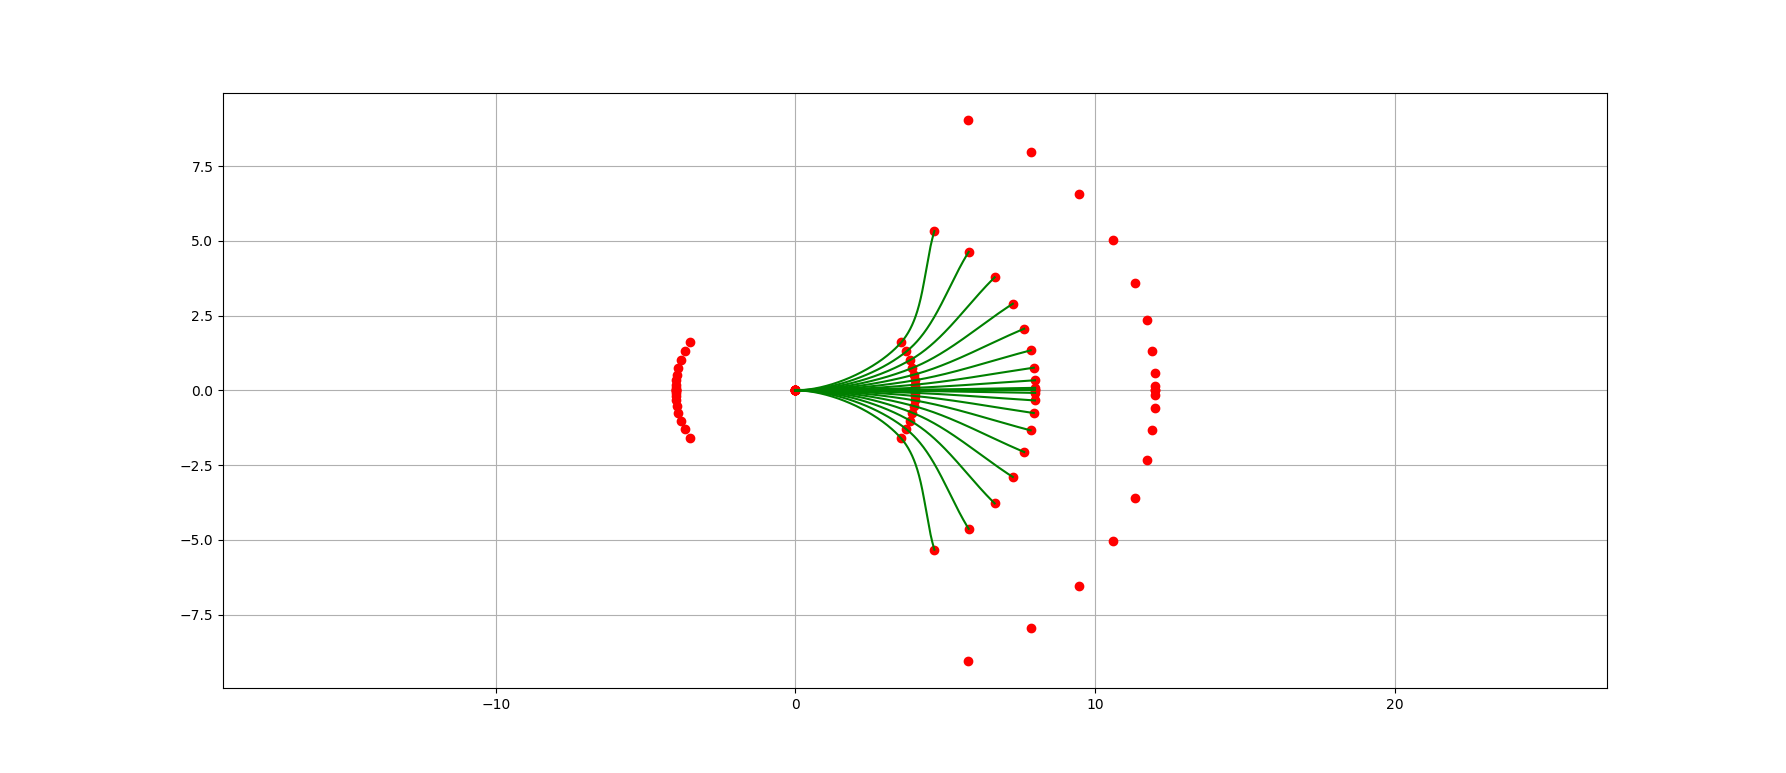

In [5]:
#https://math.stackexchange.com/questions/1789112/cubic-spline-interpolation-results

plt.figure(figsize=(15, 5))

for i in range(0, len(spline), 5):
    #p_x = np.array([priorPoint[0],origin[0],spline[i][0],spline[i+1][0]]) 
    #p_y = np.array([priorPoint[1], origin[1],spline[i][1],spline[i+1][1]])
    a=0.
    Points=np.array([np.array([ spline[i][0],spline[i][1] ]),
                     np.array([ spline[i+1][0],spline[i+1][1] ]),
                     np.array([ spline[i+2][0],spline[i+2][1]]),
                     np.array([ spline[i+3][0],spline[i+3][1]]),
                     np.array([ spline[i+4][0],spline[i+4][1]]) ])#,
                     #np.array([ spline[i+5][0],spline[i+5][1]]),
                     #np.array([ spline[i+6][0],spline[i+6][1]])  ])

    # Calculate the Catmull-Rom splines through the points
    c = CatmullRomChain(Points,a)

    # Convert the Catmull-Rom curve points into x and y arrays and plot
    x,y = zip(*c)
    plt.plot(x,y,c='green',zorder=10)

    # Plot the control points
    px, py = zip(*Points)
    plt.plot(px,py,'or')

#     a=0.5
#     c = CatmullRomChain(Points,a)
#     x,y = zip(*c)
#     plt.plot(x,y,c='blue')

#     a=1.
#     c = CatmullRomChain(Points,a)
#     x,y = zip(*c)
#     plt.plot(x,y,c='red')

plt.axis('equal')
plt.grid(b=True)
plt.show()